In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv('E:/Anaconda3/Data_v5(2).csv')
data.shape

(90076, 180)

In [8]:
data = data.dropna()
data.shape

(90076, 180)

In [9]:
print(list(data.columns))

['Run Type', 'NCARNETNO', 'DFLIGHTDT', 'CFLIGHTNO', 'Route', 'CORG', 'O_City_type', 'Org-Reg', 'CDST', 'D_City_type', 'Dst_Reg', 'Distance', 'CVEHTYPE', 'TYPE', 'Vendor', 'Capacity', 'Consdwt', 'Pcs', 'Util_conwt', 'Crit', 'Intra/Inter', 'CCONTTYPE', 'Sch/NSch/Spl', 'Sch. Departure', 'Act. Departure', 'Sch. Arrival', 'Actual Arrival', 'Expected Arrival', 'O_D', 'Departure delay', 'Arrival Delay', 'day', 'year', 'date', 'Delay', 'Delay_Flag', 'Month', 'Weekday', 'Time_Interval', 'O_D_city_type', 'Imp_Routes', 'Imp_Vendors', 'Vendor_city_type', 'Imp_CVEHTYPE', 'Run Type_AIRNET', 'Run Type_SFC', 'Run Type_SPEED', 'TYPE_MXL', 'TYPE_SXL', 'Crit_40-50%', 'Crit_50-60%', 'Crit_60-70%', 'Crit_<40%', 'Crit_>70%', 'Intra/Inter_Inter', 'Intra/Inter_Intra', 'CCONTTYPE_B', 'CCONTTYPE_C', 'CCONTTYPE_M', 'Sch/NSch/Spl_Non-Sch Run', 'Sch/NSch/Spl_Sch Run', 'Sch/NSch/Spl_Spl Run', 'O_D_EAST-EAST', 'O_D_EAST-NORTH', 'O_D_EAST-SOUTH1', 'O_D_EAST-SOUTH2', 'O_D_EAST-WEST1', 'O_D_EAST-WEST2', 'O_D_NORTH-EAST

In [10]:
data.head()

,Run Type,NCARNETNO,DFLIGHTDT,CFLIGHTNO,Route,CORG,O_City_type,Org-Reg,CDST,D_City_type,...,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,"Time_Interval_[0, 4)","Time_Interval_[4, 8)","Time_Interval_[8, 12)","Time_Interval_[12, 16)","Time_Interval_[16, 20)","Time_Interval_[20, 24)"
0,SFC,900000004829856,2018-01-01 00:00:00,PVH11,PVH,PNW,Non-Metro,WEST1,HBW,Non-Metro,...,0,0,0,0,0,1,0,0,0,0
1,SFC,900000004829641,2018-01-01 00:00:00,AMD11,AMD,AMH,Non-Metro,NORTH,DIA,Non-Metro,...,0,0,0,0,1,0,0,0,0,0
2,SFC,494218,2018-01-01 00:00:00,DRD12,DRD,DRN,Non-Metro,NORTH,MHP,Metro,...,0,0,0,0,0,0,0,0,1,0
3,SFC,900000004830087,2018-01-01 00:00:00,JNK11,JNK,JNS,Non-Metro,NORTH,KWH,Non-Metro,...,0,0,0,0,0,0,0,0,1,0
4,SFC,900000004830457,2018-01-01 00:00:00,QJA12,QJA,ATR,Non-Metro,NORTH,AMH,Non-Metro,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# delay flag distribution
data1 = data #making a copy
data1['Delay_Flag'].value_counts()

0    51474
1    38602
Name: Delay_Flag, dtype: int64

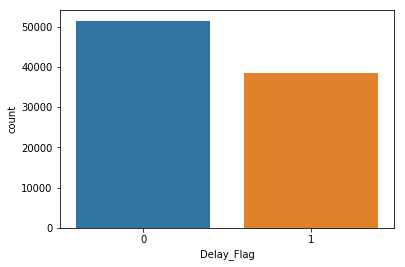

In [47]:
import seaborn as sns
sns.countplot(x='Delay_Flag', data=data1)

In [48]:
# data1.groupby('O_D_city_type').mean()

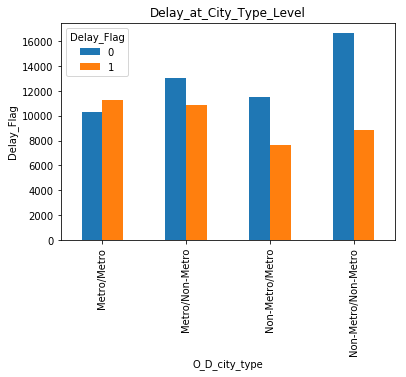

In [12]:
%matplotlib inline
pd.crosstab(data1.O_D_city_type,data.Delay_Flag).plot(kind='bar')
plt.title('Delay_at_City_Type_Level')
plt.xlabel('O_D_city_type')
plt.ylabel('Delay_Flag')
plt.savefig('Delay_at_City_Type_Level')

In [13]:
print(data1.shape)
data2= data1.filter(['Distance','Capacity', 'Consdwt', 'Pcs', 'Departure delay', 'Delay_Flag','Run Type_AIRNET', 'Run Type_SFC', 'Run Type_SPEED', 'TYPE_MXL', 'TYPE_SXL', 'Crit_40-50%', 'Crit_50-60%', 'Crit_60-70%', 'Crit_<40%', 'Crit_>70%', 'Intra/Inter_Inter', 'Intra/Inter_Intra', 'CCONTTYPE_B', 'CCONTTYPE_C', 'CCONTTYPE_M', 'Sch/NSch/Spl_Non-Sch Run', 'Sch/NSch/Spl_Sch Run', 'Sch/NSch/Spl_Spl Run', 'O_D_EAST-EAST', 'O_D_EAST-NORTH', 'O_D_EAST-SOUTH1', 'O_D_EAST-SOUTH2', 'O_D_EAST-WEST1', 'O_D_EAST-WEST2', 'O_D_NORTH-EAST', 'O_D_NORTH-NORTH', 'O_D_NORTH-SOUTH1', 'O_D_NORTH-SOUTH2', 'O_D_NORTH-WEST1', 'O_D_NORTH-WEST2', 'O_D_SOUTH1-EAST', 'O_D_SOUTH1-NORTH', 'O_D_SOUTH1-SOUTH1', 'O_D_SOUTH1-SOUTH2', 'O_D_SOUTH1-WEST1', 'O_D_SOUTH1-WEST2', 'O_D_SOUTH2-EAST', 'O_D_SOUTH2-NORTH', 'O_D_SOUTH2-SOUTH1', 'O_D_SOUTH2-SOUTH2', 'O_D_SOUTH2-WEST1', 'O_D_SOUTH2-WEST2', 'O_D_WEST1-EAST', 'O_D_WEST1-NORTH', 'O_D_WEST1-SOUTH1', 'O_D_WEST1-SOUTH2', 'O_D_WEST1-WEST1', 'O_D_WEST1-WEST2', 'O_D_WEST2-EAST', 'O_D_WEST2-NORTH', 'O_D_WEST2-SOUTH1', 'O_D_WEST2-SOUTH2', 'O_D_WEST2-WEST1', 'O_D_WEST2-WEST2', 'Imp_Routes_ADL', 'Imp_Routes_AVPWBBA', 'Imp_Routes_BAM', 'Imp_Routes_BBL', 'Imp_Routes_BCO', 'Imp_Routes_BTM', 'Imp_Routes_BTR', 'Imp_Routes_BTS', 'Imp_Routes_COB', 'Imp_Routes_GBT', 'Imp_Routes_GVH', 'Imp_Routes_GXK', 'Imp_Routes_IBP', 'Imp_Routes_KSG', 'Imp_Routes_LAM', 'Imp_Routes_MOB', 'Imp_Routes_NAC', 'Imp_Routes_Others', 'Imp_Routes_PQB', 'Imp_Routes_STC', 'Imp_Routes_TRB', 'Imp_Vendors_ABC10', 'Imp_Vendors_ABC12', 'Imp_Vendors_ABC124', 'Imp_Vendors_ABC15', 'Imp_Vendors_ABC180', 'Imp_Vendors_ABC211', 'Imp_Vendors_ABC251', 'Imp_Vendors_ABC27', 'Imp_Vendors_ABC31', 'Imp_Vendors_ABC34', 'Imp_Vendors_ABC36', 'Imp_Vendors_ABC49', 'Imp_Vendors_ABC51', 'Imp_Vendors_ABC54', 'Imp_Vendors_ABC57', 'Imp_Vendors_ABC58', 'Imp_Vendors_ABC60', 'Imp_Vendors_ABC69', 'Imp_Vendors_ABC78', 'Imp_Vendors_ABC85', 'Imp_Vendors_ABC9', 'Imp_Vendors_ABC97', 'Imp_Vendors_Others', 'Imp_CVEHTYPE_H20', 'Imp_CVEHTYPE_H24', 'Imp_CVEHTYPE_L10', 'Imp_CVEHTYPE_L14', 'Imp_CVEHTYPE_L17', 'Imp_CVEHTYPE_LCV', 'Imp_CVEHTYPE_M17', 'Imp_CVEHTYPE_M18', 'Imp_CVEHTYPE_M19', 'Imp_CVEHTYPE_M20', 'Imp_CVEHTYPE_MXL', 'Imp_CVEHTYPE_Others', 'Imp_CVEHTYPE_VAN', 'O_D_city_type_Metro/Metro', 'O_D_city_type_Metro/Non-Metro', 'O_D_city_type_Non-Metro/Metro', 'O_D_city_type_Non-Metro/Non-Metro', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Weekday_Friday', 'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday', 'Time_Interval_[0, 4)', 'Time_Interval_[4, 8)', 'Time_Interval_[8, 12)', 'Time_Interval_[12, 16)', 'Time_Interval_[16, 20)', 'Time_Interval_[20, 24)'], axis=1)

data2.shape

(90076, 180)


(90076, 142)

## SMOTE Algo for class imbalance

In [20]:
X = data2.loc[:, data2.columns != 'Delay_Flag']
y = data2.loc[:, data2.columns == 'Delay_Flag']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))


E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


length of oversampled data is  72044
Number of no subscription in oversampled data 36022
Number of subscription 36022
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [21]:
X_test.shape, X_train.shape, os_data_X.shape

((27023, 141), (63053, 141), (72044, 141))

## Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [22]:
data2_vars=data2.columns.values.tolist()
y=['Delay_Flag']
X=[i for i in data2_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False  True False False
 False False False False False  True False False False False False False
 False False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False  True False False False
  True False  True False False False False  True  True False False False
 False False False False  True False False False False False False False
  True False  True False False  True  True  True False False False  True
  True False False  True False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]
[119 122 121 120  56  14 101  24 105   1  82  81 103  83  58  66  34   1
  26  25  30  29  69  71  55  27   1  33   1  50  87  23  31   3  59

In [23]:
scores = []
for i in range(141):
    scores.append((rfe.ranking_[i],os_data_X.columns[i]))

In [24]:
# scores

In [25]:
#important features
cols = list(s[1] for s in scores if (s[0]==1))# or s[0]==2))
cols

['TYPE_SXL',
 'CCONTTYPE_B',
 'O_D_EAST-SOUTH2',
 'O_D_EAST-WEST2',
 'O_D_WEST2-EAST',
 'O_D_WEST2-SOUTH2',
 'Imp_Routes_AVPWBBA',
 'Imp_Routes_BBL',
 'Imp_Routes_COB',
 'Imp_Routes_GBT',
 'Imp_Routes_Others',
 'Imp_Vendors_ABC180',
 'Imp_Vendors_ABC251',
 'Imp_Vendors_ABC34',
 'Imp_Vendors_ABC36',
 'Imp_Vendors_ABC49',
 'Imp_Vendors_ABC58',
 'Imp_Vendors_ABC60',
 'Imp_Vendors_ABC85',
 'Imp_Vendors_Others']

In [26]:
X=os_data_X[cols]
y=os_data_y['y']

In [27]:

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

E:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.638655
         Iterations 9
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.079     
Dependent Variable:   y                AIC:              92062.5190
Date:                 2018-11-30 15:28 BIC:              92246.2197
No. Observations:     72044            Log-Likelihood:   -46011.   
Df Model:             19               LL-Null:          -49937.   
Df Residuals:         72024            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       9.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
TYPE_SXL           -1.8278   0.0337 -54.2074 0.0000 -1.8939 -1.7617
CCONTTYPE_B        -3.0533   0.2963 -10.3

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.62


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3721 7133]
 [1168 9592]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.76      0.34      0.47     10854
          1       0.57      0.89      0.70     10760

avg / total       0.67      0.62      0.58     21614

